##Ian Xavier Kuraoka - RM98860
##Raí Gumieri dos Santos - RM98287

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
health = pd.read_csv("Life Expectancy Data.csv")
health

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


##divisão de dados em conjunto de treinamentos teste

In [76]:
x = health["Year"].values.reshape(-1, 1)
y = health["infant deaths"].values.reshape(-1, 1)
print("Shape: ",x.shape, y.shape)

Shape:  (2938, 1) (2938, 1)


Text(0, 0.5, 'infant deaths')

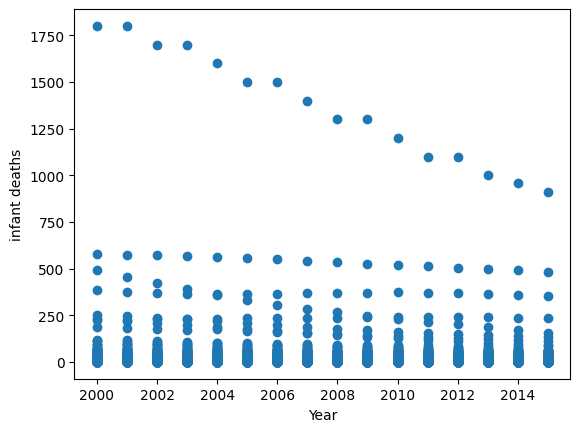

In [77]:
plt.scatter(x, y)
plt.xlabel("Year")
plt.ylabel("infant deaths")

##treinamento do modelo para regressão linear

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape[0]/4340, x_test.shape[0]/4340)

0.5076036866359447 0.1693548387096774


In [79]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

##realizar as previsões

In [80]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-1.05851426]]
y-axis intercept:  [2153.65663127]


In [81]:
model.score(x_test, y_test)

-0.0020590387797982945

In [82]:
temp = np.array([row[0] for row in x]).reshape(-1, 1)
x_min = np.array([[temp.min()]])
x_max = np.array([[temp.max()]])
print(f"Min x Value: {x_min}")
print(f"Max x Value: {x_max}")

Min x Value: [[2000]]
Max x Value: [[2015]]


In [83]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[36.62810953]]
Max y Value: [[20.75039562]]


##Visualizar os resultados

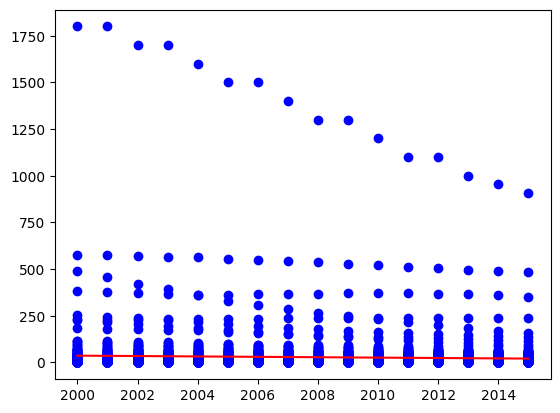

In [84]:
plt.scatter(temp, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')